In [1]:
import os
from keras.preprocessing import image 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path

Using TensorFlow backend.


In [2]:
p=Path("Train\images")
dirc=p.glob('*')
all_list=[str(d) for d in dirc]
image_data=[]
#print(all_list)
for i in all_list:
    img=image.load_img(i,target_size=(32,32))
    img_array=image.img_to_array(img)
    image_data.append(img_array)

c:\users\ayush\appdata\local\programs\python\python36\lib\site-packages\PIL\Image.py:993: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [3]:
#print(image_data)

In [4]:
# Read the  csv file of training set now
df=pd.read_csv("Train/train.csv")
print(df.head())
print(type(df))
data=df.values
print(df.shape)
Y=data[:,1]
print(Y.shape)

   ImageId NameOfPokemon
0  296.jpg       Pikachu
1  297.jpg       Pikachu
2  298.jpg       Pikachu
3  299.jpg       Pikachu
4  300.jpg       Pikachu
<class 'pandas.core.frame.DataFrame'>
(304, 2)
(304,)


In [5]:
# its basically the output of data
label_dict={"Pikachu":0,"Bulbasaur":1,"Charmander":2}
for i in range(Y.shape[0]):
    labels=Y[i]
    Y[i]=label_dict[labels]

In [6]:
# draw a sample image
label_dictionary={0:"Pikachu",1:"Bulbasaur",2:"Charmander"}
def drawImg(img,labels):
    plt.imshow(img)
    plt.title(label_dictionary[labels])
    plt.axis('off')
    plt.show()


<class 'numpy.ndarray'>
(304, 32, 32, 3)


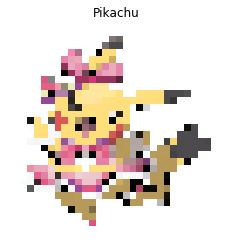

In [7]:
image_data=np.array(image_data)
print(type(image_data))
print(image_data.shape)
#print(image_data[4])
drawImg(image_data[79]/255.0,Y[79])

# Algorithm

In [8]:
def distance(x1,x2):
    return np.sqrt(np.sum((x1-x2)**2))
def KNN(x,y,query_point,k=7):
    m=x.shape[0]
    vals=[]
    for i in range(m):
        d=distance(x[i],query_point)
        vals.append((d,y[i]))
    vals=sorted(vals)
    vals=vals[:k]
    vals=np.array(vals)
    new_val=np.unique(vals[:,1],return_counts=True)
    index=new_val[1].argmax()
    pred=new_val[0][index]
    return pred

In [9]:
X=image_data
X=X.reshape((X.shape[0],-1))
print(X.shape)
print(Y.shape)

(304, 3072)
(304,)


2


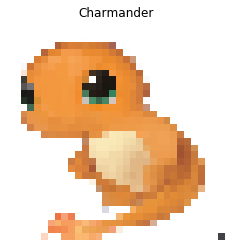

In [10]:
val=int(KNN(X,Y,X[303]))
print(val)
drawImg(image_data[303]/255.0,Y[303])

# Testing

In [19]:
# csv data
test_data=pd.read_csv('Test/test.csv')
#print(test_data.head())
test_data=test_data.values
#print(test_data)
test_data=test_data.reshape((test_data.shape[0],))
print(test_data.shape)

(123,)


In [20]:
# Lets read test images:
p=Path('Test\Images')
dirc=p.glob('*')
test_image=[str(d) for d in dirc]
print(len(test_image))
test_image_data=[]
#print(test_image)

123


In [21]:
# lets convert this image into array
for i in test_data:
    #print(i)
    img=image.load_img("Test/Images/"+i,target_size=(32,32))
    img_array=image.img_to_array(img)
    test_image_data.append(img_array)

In [22]:
test_image_data=np.array(test_image_data)
test_image_data=test_image_data.reshape((test_image_data.shape[0],-1))
X_test=test_image_data
print(X_test.shape)

(123, 3072)


In [26]:
#data=test_data.values
#print(data[5:])
predictions=[]
for i in range(test_data.shape[0]):
    val=int(KNN(X,Y,X_test[i]))
    predictions.append(label_dictionary[val])    

In [32]:
# Now we have to make a csv file having 2 columns and write data into it
#print(data)
# data=> id
#print(type(predictions))
predictions=np.array(predictions)
print(type(data))
print(type(predictions))
test_data=test_data.reshape((test_data.shape[0],))
predictions=predictions.reshape((predictions.shape[0],))
print(test_data.shape,predictions.shape)
#predictions=predictions.reshape(())
#print(predictions.shape)

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
(123,) (123,)


In [34]:
result=np.stack((test_data,predictions),axis=1)

In [35]:
print(type(result))

<class 'numpy.ndarray'>


In [36]:
result_df=pd.DataFrame(result,columns=["ImageId","NameOfPokemon"])
print(result_df.head())

    ImageId NameOfPokemon
0  1106.jpg     Bulbasaur
1  2236.jpg    Charmander
2  1131.jpg     Bulbasaur
3  2221.jpg    Charmander
4  2011.jpg     Bulbasaur


In [37]:
result_df.to_csv("Pokemon_output2.csv",index=False)